## Imports

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from keras.models import Sequential
from keras.layers.core import Dense, Activation

from keras.wrappers.scikit_learn import KerasRegressor

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
!head 'train.txt'

head: cannot open 'train.txt' for reading: No such file or directory


In [8]:
ls

Model-Prototypes.ipynb  RUL_FD004.txt   test_FD004.txt   train_FD004.txt
RUL_FD001.txt           test_FD001.txt  train_FD001.txt  Untitled.ipynb
RUL_FD002.txt           test_FD002.txt  train_FD002.txt  work/
RUL_FD003.txt           test_FD003.txt  train_FD003.txt


In [107]:
def load_datafile(filename):
        df = pd.read_csv('train_FD001.txt', sep=' ', header=None)
        df.drop(df.columns[[26, 27]], axis=1, inplace=True)
        cols = ['unit', 'cycles', 'op_setting1', 'op_setting2', 'op_setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']
        df.columns = cols
        return df

In [9]:
    df = pd.read_csv('train_FD001.txt', sep=' ', header=None)
    df.drop(df.columns[[26, 27]], axis=1, inplace=True)
    cols = ['unit', 'cycles', 'op_setting1', 'op_setting2', 'op_setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']
    df.columns = cols
    df.head()

,unit,cycles,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


## Classification

### Split into healthy / degradeed

#### Create RUL

In [10]:
unit_max = dict(df.groupby('unit')['cycles'].max())
df['RUL'] = df.unit.map(unit_max) - df.cycles
df[df.unit==1].head()

,unit,cycles,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [11]:
df[df.unit==1].tail()

,unit,cycles,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588,4
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127,3
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675,2
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295,1
191,1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,...,2388.32,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649,0


#### Label healthy/degraded

In [12]:
c = df[(df.cycles<=30)| (df.RUL<=30)]
print(len(c), len(c)/len(df))

6100 0.2956715622122049


<AxesSubplot:>

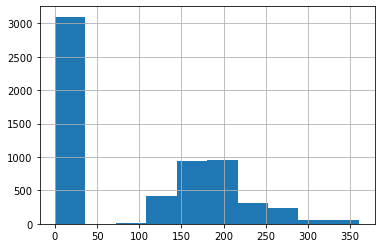

In [13]:
c.RUL.hist()

In [14]:
def classify(rul):
    if rul <= 30:
        return(1) #Degraded
    elif rul > 30:
        return(0) #Healthy
c['cat'] = df['RUL'].map(classify)
c.cat.value_counts()

1    3100
0    3000
Name: cat, dtype: int64

In [15]:
c.columns

Index(['unit', 'cycles', 'op_setting1', 'op_setting2', 'op_setting3', 's1',
       's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12',
       's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 'RUL',
       'cat'],
      dtype='object')

In [16]:
X = c[['op_setting1', 'op_setting2', 'op_setting3', 's1',
       's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12',
       's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']]
y = c['cat']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [18]:
!pip install datetime

In [19]:
import datetime

In [20]:
start = datetime.datetime.now()

classifiers = [
KNeighborsClassifier(3),
SVC(kernel="rbf", C=0.025, probability=True),
NuSVC(probability=True),
DecisionTreeClassifier(),
RandomForestClassifier(),
AdaBoostClassifier(),
GradientBoostingClassifier()
]
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', StandardScaler()),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))

end = datetime.datetime.now()
elapsed = end - start
print('Process took: {}'.format(elapsed))

KNeighborsClassifier(n_neighbors=3)
model score: 0.996
SVC(C=0.025, probability=True)
model score: 0.997
NuSVC(probability=True)
model score: 0.995
DecisionTreeClassifier()
model score: 0.980
RandomForestClassifier()
model score: 0.996
AdaBoostClassifier()
model score: 0.995
GradientBoostingClassifier()
model score: 0.995
Process took: 0:00:08.243712


## MLP RUL Estimator

In [38]:
X_cols = ['op_setting1', 'op_setting2', 'op_setting3', 's1',
       's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12',
       's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']
X = df[X_cols]
y = df['RUL']
# X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [82]:
def create_model(optimizer='adagrad',
                 kernel_initializer='glorot_uniform', 
                 dropout=0.2):
    model = Sequential()
    model.add(Dense(10, input_dim=24, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, input_dim=10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, input_dim=10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')


    return model

# wrap the model using the function you created
reg = KerasRegressor(build_fn=create_model,verbose=0)

scaler = StandardScaler()

# create parameter grid, as usual, but note that you can
# vary other model parameters such as 'epochs' (and others 
# such as 'batch_size' too)
param_grid = {
    'clf__optimizer':['rmsprop','adam','adagrad'],
    'clf__epochs':[4,8],
    'clf__dropout':[0.1,0.2],
    'clf__kernel_initializer':['glorot_uniform','normal','uniform']
}

pipeline = Pipeline([
    ('preprocess',scaler),
    ('reg',reg)
])

pipeline.fit(X, y)

Pipeline(steps=[('preprocess', StandardScaler()),
                ('reg',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f97e9e91dc0>)])

In [83]:
start = datetime.datetime.now()

model = Sequential()
model.add(Dense(10, input_dim=24, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, input_dim=10, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, input_dim=10, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X, y, epochs=30)

end = datetime.datetime.now()
elapsed = end - start
print('Process took: {}'.format(elapsed))

Epoch 1/30
645/645 [==============================] - 1s 783us/step - loss: 5272.1968
Epoch 2/30
645/645 [==============================] - 1s 777us/step - loss: 4783.5000
Epoch 3/30
645/645 [==============================] - 1s 784us/step - loss: 4791.0151
Epoch 4/30
645/645 [==============================] - 1s 785us/step - loss: 4777.3711
Epoch 5/30
645/645 [==============================] - 1s 797us/step - loss: 4785.3335
Epoch 6/30
645/645 [==============================] - 1s 788us/step - loss: 4772.9795
Epoch 7/30
645/645 [==============================] - 1s 791us/step - loss: 4782.2979
Epoch 8/30
645/645 [==============================] - 1s 788us/step - loss: 4779.8916
Epoch 9/30
645/645 [==============================] - 1s 779us/step - loss: 4773.2734
Epoch 10/30
645/645 [==============================] - 1s 796us/step - loss: 4775.8306
Epoch 11/30
645/645 [==============================] - 1s 790us/step - loss: 4772.7178
Epoch 12/30
645/645 [==============================]

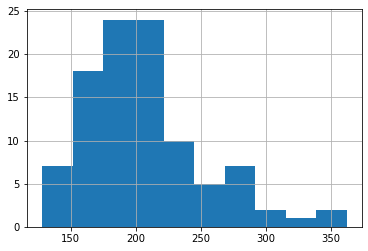

In [41]:
df.groupby('unit').cycles.max().hist();

## Comparing Unit Predictions to RUL

### Comparing Unit 1 Predictions

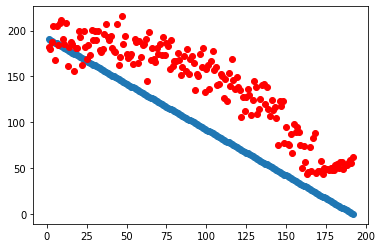

In [84]:
unit1 = df[df.unit==1]
unit1_pred = pipeline.predict(unit1[X_cols])
plt.scatter(unit1.cycles, unit1.RUL)
plt.scatter(unit1.cycles, unit1_pred, c='red')

### Unit 2

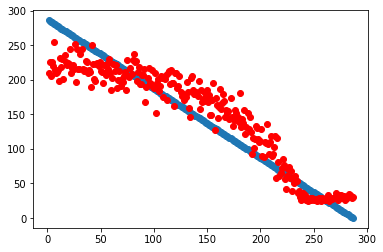

In [100]:
unit1 = df[df.unit==2]
unit1_pred = pipeline.predict(unit1[X_cols])
plt.scatter(unit1.cycles, unit1.RUL)
plt.scatter(unit1.cycles, unit1_pred, c='red')

### Unit 47

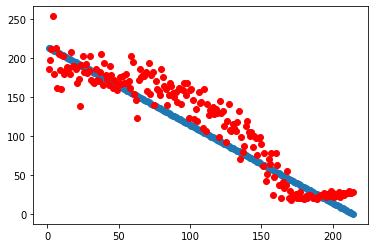

In [103]:
unit = df[df.unit==47]
unit_pred = pipeline.predict(unit[X_cols])
plt.scatter(unit.cycles, unit.RUL)
plt.scatter(unit.cycles, unit_pred, c='red')

### Exploring the Distribution of Predictions

(array([2570., 3008., 1822., 2587., 3316., 3105., 2427., 1410.,  363.,
          23.]),
 array([  5.636813,  31.365374,  57.093937,  82.822495, 108.551056,
        134.27962 , 160.00818 , 185.73674 , 211.4653  , 237.19386 ,
        262.92242 ], dtype=float32),
 <BarContainer object of 10 artists>)

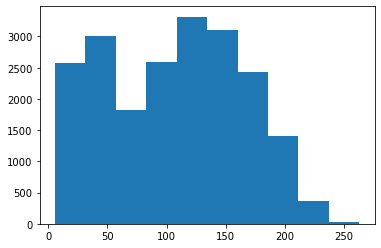

In [85]:
y_hat = pipeline.predict(X)
plt.hist(y_hat)

## Applying the Model to the Test Set

In [185]:
len(test)

20631

In [108]:
test = load_datafile('test_FD001.txt')
test.head()

,unit,cycles,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [110]:
rul_hat = pipeline.predict(test[X_cols])
rul_hat[:5]

array([182.5192 , 180.16232, 187.53845, 205.1249 , 168.40451],
      dtype=float32)

In [119]:
test[test.unit==1].tail() #idx range of cycles groups...get rul_hat values

,unit,cycles,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295
191,1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,...,520.08,2388.32,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649


In [120]:
len(test)

20631

### Summarizing Predictions

Currently, the model predicts RUL for every point, but we need a single projection for each unit. As a first step, we could calculate the total projected lifetime by adding the projected RUL to the current number of lifecycles. This is necessary since we expect, or at least hope, that predictions for the RUL will decrease for later observed cycles.Afterwards, we could then summarize our predictions using the mean or another measure of center.  We may even wish to layer on a simplistic regression model of the RUL predictions to project failure.

In [197]:
output = test
output['RUL'] = rul_hat
output.head()

,unit,cycles,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,TotalProjectedLifetime,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,183.519196,182.519196
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,182.162323,180.162323
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,190.538452,187.538452
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,209.124893,205.124893
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,173.404510,168.404510


This nicely shows that our projected RUL is indeed decreasing over time, as hoped.

<AxesSubplot:xlabel='cycles'>

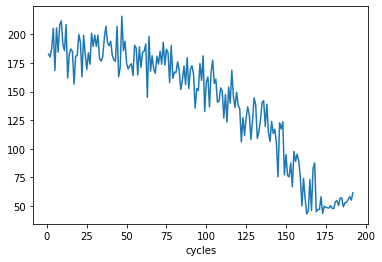

In [217]:
output[output.unit==1].set_index('cycles')['RUL'].plot()

<AxesSubplot:xlabel='cycles'>

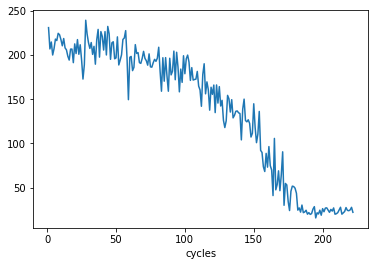

In [215]:
output[output.unit==10].set_index('cycles')['RUL'].plot()

<AxesSubplot:xlabel='cycles'>

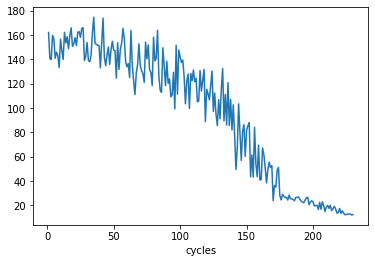

In [214]:
output[output.unit==25].set_index('cycles')['RUL'].plot()

## Calculating Total Projected Lifetime

In [223]:
test['TotalProjectedLifetime'] = test.cycles + rul_hat
avg_projected_lifespan = test.groupby('unit')['TotalProjectedLifetime'].mean()
avg_projected_lifespan[:5]

unit
1    237.087036
2    291.373627
3    204.641830
4    197.196487
5    246.620407
Name: TotalProjectedLifetime, dtype: float32

## Examining Projected Lifetime Stability

<AxesSubplot:xlabel='cycles'>

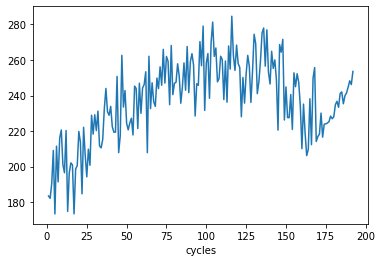

In [213]:
output[output.unit==1].set_index('cycles')['TotalProjectedLifetime'].plot()

<AxesSubplot:xlabel='cycles'>

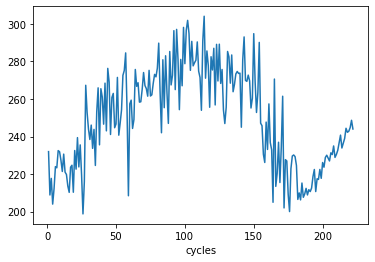

In [211]:
output[output.unit==10].set_index('cycles')['TotalProjectedLifetime'].plot()

<AxesSubplot:xlabel='cycles'>

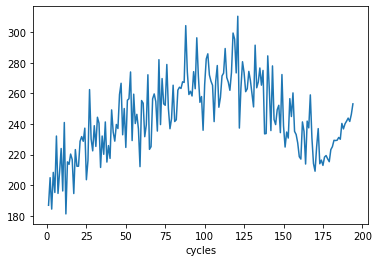

In [212]:
output[output.unit==30].set_index('cycles')['TotalProjectedLifetime'].plot()

<AxesSubplot:>

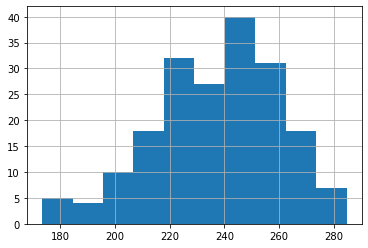

In [130]:
test[test.unit==1]['TotalProjectedLifetime'].hist()

In [131]:
len(avg_projected_lifespan)

100

In [132]:
len(cycles_to_date)

100

<AxesSubplot:>

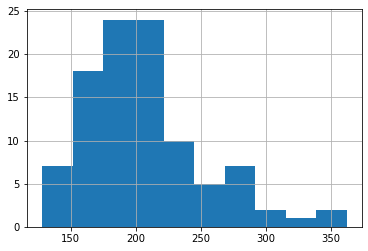

In [134]:
cycles_to_date.hist()

In [135]:
len()

20631

## Calculating the Final Projected Remaining Useful Lifecycles

In [129]:
cycles_to_date = test.groupby('unit')['cycles'].max()
projected_rlu = avg_projected_lifespan - cycles_to_date
projected_rlu.head()

unit
1    45.087036
2     4.373627
3    25.641830
4     8.196487
5   -22.379593
dtype: float64

**Notes:** this approach has led to some predictions being negative, an obvious error. Perhaps a small improvement is to only consider the predictions from the final n observed cycles for a given unit.

## Comparing to the Reported RUL

In [181]:
rul = pd.read_csv('RUL_FD001.txt', header=None)
rul.head()

,0
0,112
1,98
2,69
3,82
4,91


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

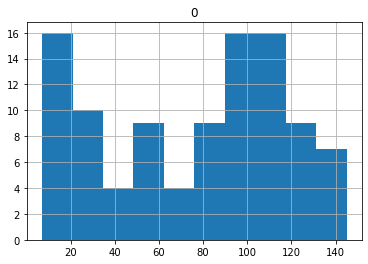

In [182]:
rul.hist()

In [237]:
avg_projected_lifespan2 = test.groupby('unit').tail(5).groupby('unit')['TotalProjectedLifetime'].mean()
projected_rlu2 = avg_projected_lifespan2 - cycles_to_date
projected_rlu2.head(20)

unit
1     54.857040
2     29.998199
3      3.636810
4      3.636810
5     10.599426
6     60.931702
7     39.147369
8     53.444855
9      3.636810
10    22.486206
11     9.640244
12    51.189774
13    10.042068
14    17.026398
15    54.537811
16    48.339203
17     3.985321
18     3.636810
19    55.911774
20    41.579559
dtype: float64

## Further Exploring the Train and Test Sets

128


<AxesSubplot:>

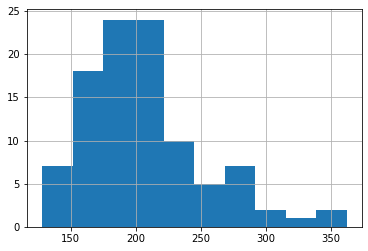

In [175]:
print(min(test.groupby('unit')['cycles'].max()))
test.groupby('unit')['cycles'].max().hist()

<AxesSubplot:>

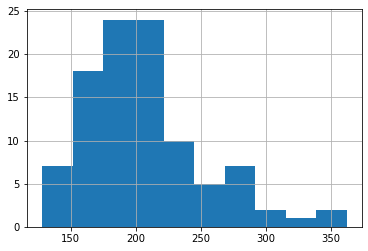

In [176]:
df.groupby('unit')['cycles'].max().hist()

array([[<AxesSubplot:title={'center':'112 '}>]], dtype=object)

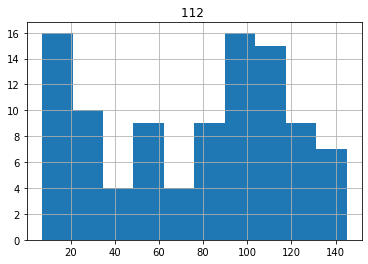

In [178]:
rul.hist()

## Outlining and RNN Approach

* Split X based on groups / generate sequences
* Create RNN to predict future states
* Layer classifier to determine if this state represents a component failure or not

In [189]:
test.head()

,unit,cycles,op_setting1,op_setting2,op_setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,TotalProjectedLifetime
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,183.519196
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,182.162323
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,190.538452
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,209.124893
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,173.404510


In [ ]:
from keras.preprocessing import sequence

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))                                ❶
model.summary()

In [ ]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targetsxt